In [44]:
import requests
import pprint
import json
import pandas as pd
from pandas.io.json import json_normalize

## API 받아오기
- key에는 encoding, decoding 두가지가 있는데 둘다 사용해보고 돌아가는 것으로 넣을것
- 여기서는 decoding 키가 들어감
- 웹 브라우저에서 바로 call 할 땐 encoding키를 사용하고 프로그램은 decoding키를 사용한다.
- 보통 json이 xml보다 가볍고 파싱하기가 쉽다

In [35]:
# Python3 샘플 코드 #

decoding = ''
encoding =''

# api parameter call 하는 부분
# params 에 원하는 값 넣어주면 된다
# fstring방식도 사용 가능함
url = 'http://apis.data.go.kr/1480523/LvlhPpnWatUsageService/getLvlhPpnWatUsageInfo'
params ={'serviceKey' : decoding, 'numOfRows' : '1000',
         'pageNo' : '1', 'resultType' : 'json',
         'startYear' : '2012', 'endYear' : '2022',
         'adivi_cd' : '3014011600',
         'city_nm' : '대전광역시', 'citicoungu_nm' : '',
         'adivi_doung_nm' : '', 'adivi_ni_nm' : '' }

response = requests.get(url, params=params) # json파일 접근

contents = response.text

# 정리
pp = pprint.PrettyPrinter(indent=4)
print(pp.pprint(contents))

('{"getLvlhPpnWatUsageInfo":{"header":{"code":"00","message":"NORMAL '
 'SERVICE"},"item":[{"NUM":1,"YEAR":"2012","ADIVICD":"3014011600","CITYNM":"대전광역시","CITICOUNGUNM":"중구","ADIVIDOUNGNM":"문화동","ADIVININM":null,"SEWAGEFACILNM":"대전하수종말처리장","SEWAGEFACILCD":"302000W01","NIGSOLPROCNM":"대전위생처리장","NIGSOLPROCCD":"302300F01","PARSPEC":"일반지역","FAMYWATERSUMCNT":7888.1,"CHYSEWERSYSWATER":718.8,"CHYCONFLUWATER":7090.4,"CHYDIRTYWNOTWATER":0,"CHYWATTANKNOTWATER":0,"CHYREMOVNOTWATER":0,"VICHYSEWERSYSWATER":7.3,"VICHYCONFLUWATER":71.6,"VICHYDIRTYWNOTWATER":0,"VICHYWATTANKNOTWATER":0,"VICHYREMOVNOTWATER":0,"AMUTWATERSUMCNT":2567.73,"CHYSEWAGEAMUT":2542.03,"CHYSEWAGENOTAMUT":0,"VICHYSEWAGEAMUT":25.70030027,"VICHYSEWAGENOTAMUT":0},{"NUM":2,"YEAR":"2013","ADIVICD":"3014011600","CITYNM":"대전광역시","CITICOUNGUNM":"중구","ADIVIDOUNGNM":"문화동","ADIVININM":null,"SEWAGEFACILNM":"대전하수종말처리장","SEWAGEFACILCD":"302000W01","NIGSOLPROCNM":"대전위생처리장","NIGSOLPROCCD":"302300F01","PARSPEC":"일반지역","FAMYWATERSUMCNT":7917,"CHYSEWE

## 문자열 json 변환

In [37]:
json_txt = json.loads(contents)
print(type(json_txt))

<class 'dict'>


## 값 가져오기

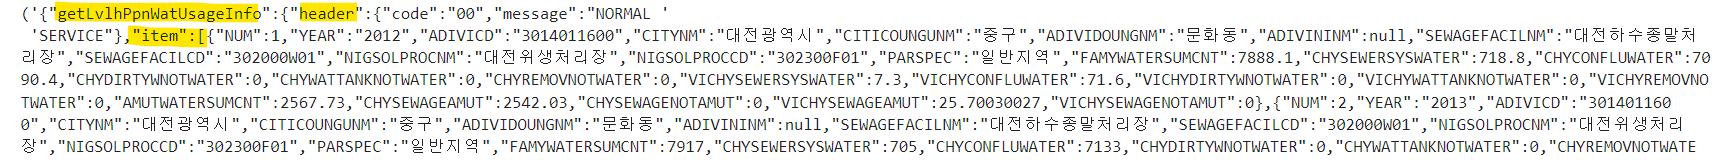
- 중요! 출력된 값을 보면 getLvlhPpnWatUsageInfo -> header -> item순으로
- item속에 원하는 정보가 포함 된 것을 확인할 수 있다

In [43]:
body = json_txt['getLvlhPpnWatUsageInfo']['item']
print(body)

[{'NUM': 1, 'YEAR': '2012', 'ADIVICD': '3014011600', 'CITYNM': '대전광역시', 'CITICOUNGUNM': '중구', 'ADIVIDOUNGNM': '문화동', 'ADIVININM': None, 'SEWAGEFACILNM': '대전하수종말처리장', 'SEWAGEFACILCD': '302000W01', 'NIGSOLPROCNM': '대전위생처리장', 'NIGSOLPROCCD': '302300F01', 'PARSPEC': '일반지역', 'FAMYWATERSUMCNT': 7888.1, 'CHYSEWERSYSWATER': 718.8, 'CHYCONFLUWATER': 7090.4, 'CHYDIRTYWNOTWATER': 0, 'CHYWATTANKNOTWATER': 0, 'CHYREMOVNOTWATER': 0, 'VICHYSEWERSYSWATER': 7.3, 'VICHYCONFLUWATER': 71.6, 'VICHYDIRTYWNOTWATER': 0, 'VICHYWATTANKNOTWATER': 0, 'VICHYREMOVNOTWATER': 0, 'AMUTWATERSUMCNT': 2567.73, 'CHYSEWAGEAMUT': 2542.03, 'CHYSEWAGENOTAMUT': 0, 'VICHYSEWAGEAMUT': 25.70030027, 'VICHYSEWAGENOTAMUT': 0}, {'NUM': 2, 'YEAR': '2013', 'ADIVICD': '3014011600', 'CITYNM': '대전광역시', 'CITICOUNGUNM': '중구', 'ADIVIDOUNGNM': '문화동', 'ADIVININM': None, 'SEWAGEFACILNM': '대전하수종말처리장', 'SEWAGEFACILCD': '302000W01', 'NIGSOLPROCNM': '대전위생처리장', 'NIGSOLPROCCD': '302300F01', 'PARSPEC': '일반지역', 'FAMYWATERSUMCNT': 7917, 'CHYSEWERSYSWATE

## 추출된 값을 DataFrame으로

- json_normalize() 사용

In [45]:
df = json_normalize(body)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_15592\3061816700.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = json_normalize(body)


,NUM,YEAR,ADIVICD,CITYNM,CITICOUNGUNM,ADIVIDOUNGNM,ADIVININM,SEWAGEFACILNM,SEWAGEFACILCD,NIGSOLPROCNM,...,VICHYSEWERSYSWATER,VICHYCONFLUWATER,VICHYDIRTYWNOTWATER,VICHYWATTANKNOTWATER,VICHYREMOVNOTWATER,AMUTWATERSUMCNT,CHYSEWAGEAMUT,CHYSEWAGENOTAMUT,VICHYSEWAGEAMUT,VICHYSEWAGENOTAMUT
0,1,2012,3014011600,대전광역시,중구,문화동,None,대전하수종말처리장,302000W01,대전위생처리장,...,7.30000,71.600000,0,0,0,2567.73,2542.03,0.00,25.7003,0.00
1,2,2013,3014011600,대전광역시,중구,문화동,None,대전하수종말처리장,302000W01,대전위생처리장,...,7.00000,72.000000,0,0,0,2592.00,2566.00,0.00,26.0000,0.00
2,3,2014,3014011600,대전광역시,중구,문화동,None,대전하수종말처리장,302000W01,대전위생처리장,...,7.04000,71.570000,0,0,0,2636.71,2610.35,0.00,26.3600,0.00
3,4,2015,3014011600,대전광역시,중구,문화동,None,대전하수종말처리장,302000W01,대전위생처리장,...,7.12509,70.279294,0,0,0,2699.93,2666.21,6.72,26.9300,0.07
4,5,2016,3014011600,대전광역시,중구,문화동,None,대전하수종말처리장,302000W01,대전위생처리장,...,7.87000,79.540000,0,0,0,896.07,872.79,14.33,8.8100,0.14


In [50]:
df.shape

(9, 28)

- from_dict() 사용

In [47]:
df2 = pd.DataFrame.from_dict(body, orient='columns')
df2.head()

,NUM,YEAR,ADIVICD,CITYNM,CITICOUNGUNM,ADIVIDOUNGNM,ADIVININM,SEWAGEFACILNM,SEWAGEFACILCD,NIGSOLPROCNM,...,VICHYSEWERSYSWATER,VICHYCONFLUWATER,VICHYDIRTYWNOTWATER,VICHYWATTANKNOTWATER,VICHYREMOVNOTWATER,AMUTWATERSUMCNT,CHYSEWAGEAMUT,CHYSEWAGENOTAMUT,VICHYSEWAGEAMUT,VICHYSEWAGENOTAMUT
0,1,2012,3014011600,대전광역시,중구,문화동,None,대전하수종말처리장,302000W01,대전위생처리장,...,7.30000,71.600000,0,0,0,2567.73,2542.03,0.00,25.7003,0.00
1,2,2013,3014011600,대전광역시,중구,문화동,None,대전하수종말처리장,302000W01,대전위생처리장,...,7.00000,72.000000,0,0,0,2592.00,2566.00,0.00,26.0000,0.00
2,3,2014,3014011600,대전광역시,중구,문화동,None,대전하수종말처리장,302000W01,대전위생처리장,...,7.04000,71.570000,0,0,0,2636.71,2610.35,0.00,26.3600,0.00
3,4,2015,3014011600,대전광역시,중구,문화동,None,대전하수종말처리장,302000W01,대전위생처리장,...,7.12509,70.279294,0,0,0,2699.93,2666.21,6.72,26.9300,0.07
4,5,2016,3014011600,대전광역시,중구,문화동,None,대전하수종말처리장,302000W01,대전위생처리장,...,7.87000,79.540000,0,0,0,896.07,872.79,14.33,8.8100,0.14


In [49]:
df2.shape

(9, 28)

## csv로 저장하기

In [67]:
df.to_csv('water_daejeon.csv',index=False)

In [68]:
d = pd.read_csv('water_daejeon.csv')
d.head()

,NUM,YEAR,ADIVICD,CITYNM,CITICOUNGUNM,ADIVIDOUNGNM,ADIVININM,SEWAGEFACILNM,SEWAGEFACILCD,NIGSOLPROCNM,...,VICHYSEWERSYSWATER,VICHYCONFLUWATER,VICHYDIRTYWNOTWATER,VICHYWATTANKNOTWATER,VICHYREMOVNOTWATER,AMUTWATERSUMCNT,CHYSEWAGEAMUT,CHYSEWAGENOTAMUT,VICHYSEWAGEAMUT,VICHYSEWAGENOTAMUT
0,1,2012,3014011600,대전광역시,중구,문화동,NaN,대전하수종말처리장,302000W01,대전위생처리장,...,7.30000,71.600000,0,0,0,2567.73,2542.03,0.00,25.7003,0.00
1,2,2013,3014011600,대전광역시,중구,문화동,NaN,대전하수종말처리장,302000W01,대전위생처리장,...,7.00000,72.000000,0,0,0,2592.00,2566.00,0.00,26.0000,0.00
2,3,2014,3014011600,대전광역시,중구,문화동,NaN,대전하수종말처리장,302000W01,대전위생처리장,...,7.04000,71.570000,0,0,0,2636.71,2610.35,0.00,26.3600,0.00
3,4,2015,3014011600,대전광역시,중구,문화동,NaN,대전하수종말처리장,302000W01,대전위생처리장,...,7.12509,70.279294,0,0,0,2699.93,2666.21,6.72,26.9300,0.07
4,5,2016,3014011600,대전광역시,중구,문화동,NaN,대전하수종말처리장,302000W01,대전위생처리장,...,7.87000,79.540000,0,0,0,896.07,872.79,14.33,8.8100,0.14
